In [1]:
import importlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
from multi_loc import covariance, assimilate

In [3]:
%matplotlib inline

In [4]:
importlib.reload(covariance)

<module 'multi_loc.covariance' from '/Users/harty/Documents/multi_loc/multi_loc/covariance.py'>

In [5]:
dimension = 100
rho0 = 20
rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
dx = 1
rho = rho*dx

In [6]:
eig_val_old, eig_vec_old, P_old = covariance.generate_circulant_old(
    rho, rho0, covariance.correlation_exp,
    return_Corr = True)
P_old = P_old.real

Text(0.5,1,'Eigenvalues (imaginary)')

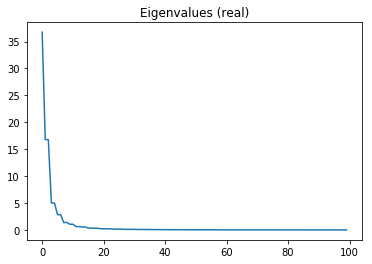

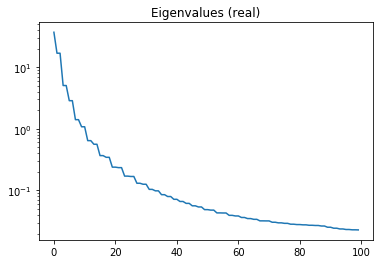

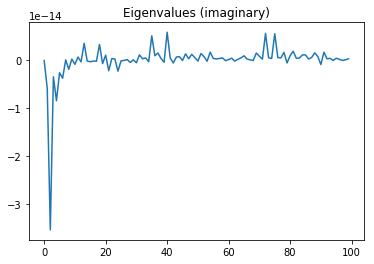

In [7]:
plt.figure()
plt.plot(eig_val_old.real)
plt.title('Eigenvalues (real)')

plt.figure()
plt.semilogy(eig_val_old.real)
# plt.ylim([0, 1])
plt.title('Eigenvalues (real)')

plt.figure()
plt.plot(eig_val_old.imag)
plt.title('Eigenvalues (imaginary)')

In [20]:
np.diag(P)

array([1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343537,
       1.00343537, 1.00343537, 1.00343537, 1.00343537, 1.00343

Log10(condition):  3.204300912305241


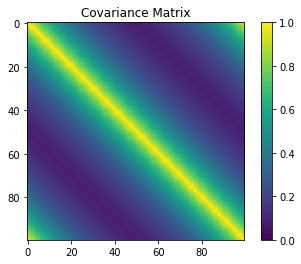

In [9]:
plt.figure()
im = plt.imshow(P_old, vmin=0, vmax=1)
plt.colorbar(im)
plt.title('Covariance Matrix')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P_old)))

In [21]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_exp_1d,
    return_Corr = True)
P = P.real

Text(0.5,1,'Eigenvalues (imaginary)')

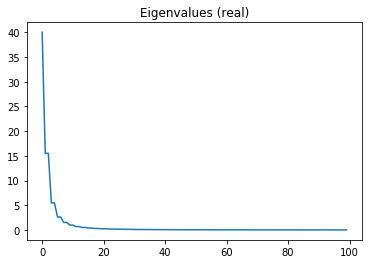

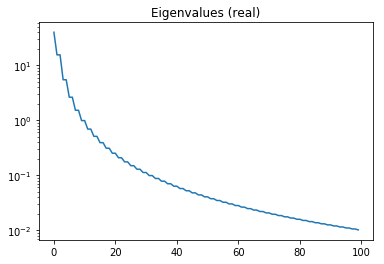

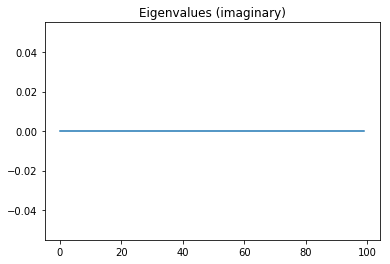

In [13]:
plt.figure()
plt.plot(eig_val.real)
plt.title('Eigenvalues (real)')

plt.figure()
plt.semilogy(eig_val.real)
# plt.ylim([0, 1])
plt.title('Eigenvalues (real)')

plt.figure()
plt.plot(eig_val.imag)
plt.title('Eigenvalues (imaginary)')

In [17]:
P_old.max()

1.0000000000000013

In [16]:
P.max()

1.0034353717383664

Log10(condition):  3.5964697308631752


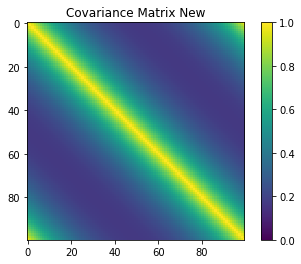

In [15]:
plt.figure()
im = plt.imshow(P, vmin=0, vmax=1)
plt.colorbar(im)
plt.title('Covariance Matrix New')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P)))

Text(0.5,1,'Eigenvalues (real) relative difference')

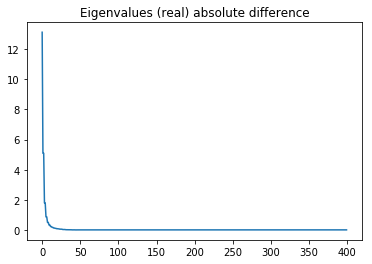

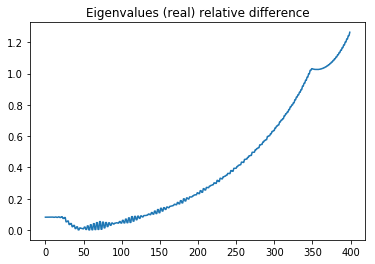

In [35]:
plt.figure()
plt.plot(np.abs(
    (eig_val_old.real - eig_val)))
plt.title('Eigenvalues (real) absolute difference')

plt.figure()
plt.plot(np.abs(
    (eig_val_old.real - eig_val)/eig_val))
plt.title('Eigenvalues (real) relative difference')

Log10(condition):  19.530662836796044


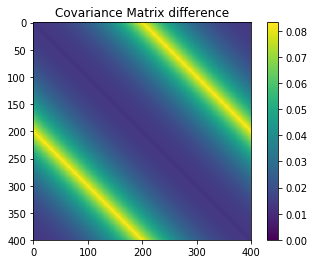

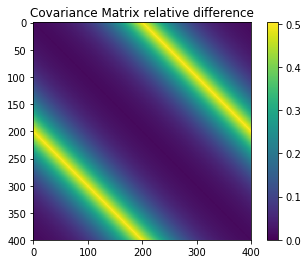

In [36]:
plt.figure()
im = plt.imshow(abs(P_old - P), vmin=0)
plt.colorbar(im)
plt.title('Covariance Matrix difference')

plt.figure()
im = plt.imshow(abs((P_old - P)/P), vmin=0)
plt.colorbar(im)
plt.title('Covariance Matrix relative difference')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P_new)))

# With sqd exp

In [37]:
eig_val_old, eig_vec_old, P_old = covariance.generate_circulant_old(
    rho, rho0, covariance.correlation_sqd_exp,
    return_Corr = True)
P_old = P_old.real

Text(0.5,1,'Eigenvalues (imaginary)')

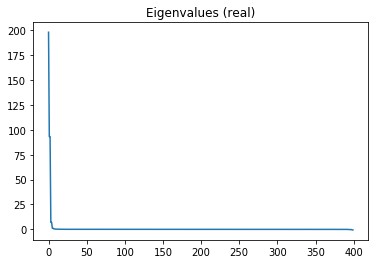

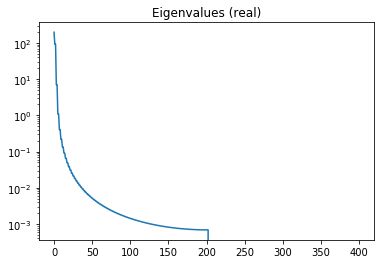

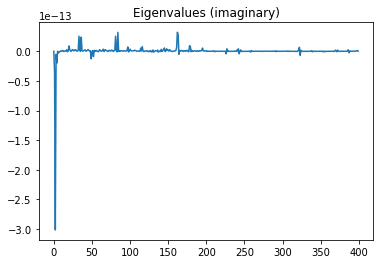

In [38]:
plt.figure()
plt.plot(eig_val_old.real)
plt.title('Eigenvalues (real)')

plt.figure()
plt.semilogy(eig_val_old.real)
# plt.ylim([0, 1])
plt.title('Eigenvalues (real)')

plt.figure()
plt.plot(eig_val_old.imag)
plt.title('Eigenvalues (imaginary)')

Log10(condition):  4.800486594822287


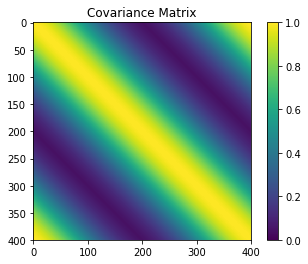

In [39]:
plt.figure()
im = plt.imshow(P_old, vmin=0, vmax=1)
plt.colorbar(im)
plt.title('Covariance Matrix')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P)))

In [40]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr = True)
P = P.real

Text(0.5,1,'Eigenvalues (imaginary)')

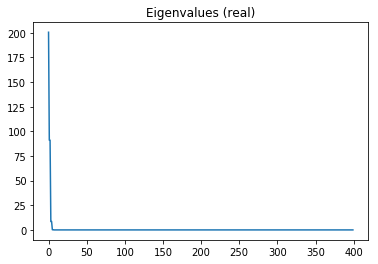

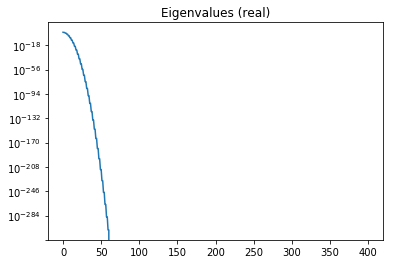

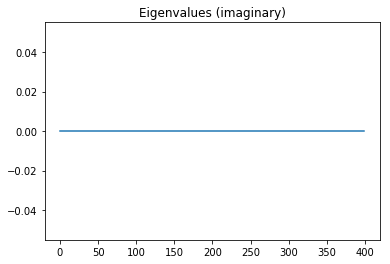

In [41]:
plt.figure()
plt.plot(eig_val.real)
plt.title('Eigenvalues (real)')

plt.figure()
plt.semilogy(eig_val.real)
# plt.ylim([0, 1])
plt.title('Eigenvalues (real)')

plt.figure()
plt.plot(eig_val.imag)
plt.title('Eigenvalues (imaginary)')

Log10(condition):  19.530662836796044


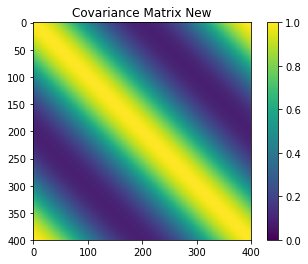

In [42]:
plt.figure()
im = plt.imshow(P, vmin=0, vmax=1)
plt.colorbar(im)
plt.title('Covariance Matrix New')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P_new)))

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0.5,1,'Eigenvalues (real) relative difference')

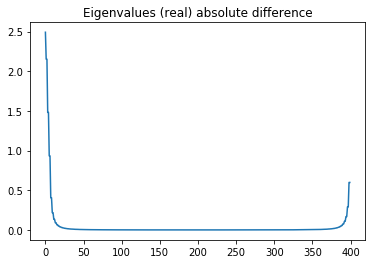

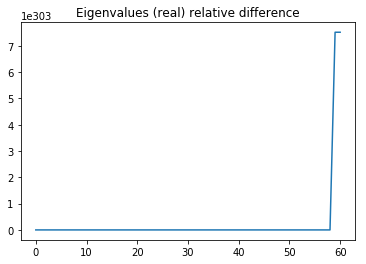

In [43]:
plt.figure()
plt.plot(np.abs(
    (eig_val_old.real - eig_val)))
plt.title('Eigenvalues (real) absolute difference')

plt.figure()
plt.plot(np.abs(
    (eig_val_old.real - eig_val)/eig_val))
plt.title('Eigenvalues (real) relative difference')

Log10(condition):  19.530662836796044


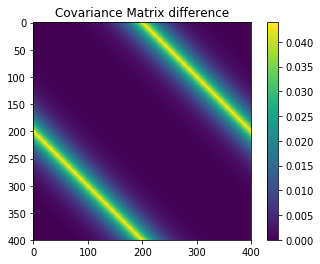

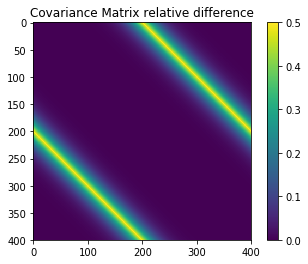

In [45]:
plt.figure()
im = plt.imshow(abs(P_old - P), vmin=0)
plt.colorbar(im)
plt.title('Covariance Matrix difference')

plt.figure()
im = plt.imshow(abs((P_old - P)/P), vmin=0)
plt.colorbar(im)
plt.title('Covariance Matrix relative difference')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P)))

In [64]:
dimension = 100
rho0 = 4
rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
dx = 1
rho = rho*dx

In [65]:
eig_val, eig_vec, P = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_exp_1d,
    return_Corr = True)
P = P.real

Text(0.5,1,'Error in Reconstructed P')

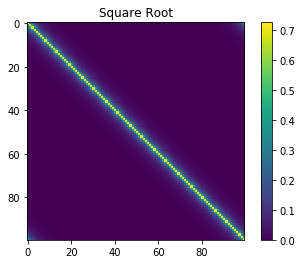

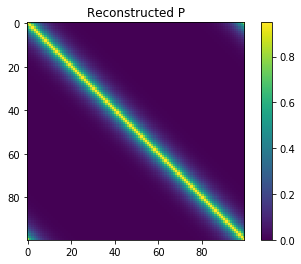

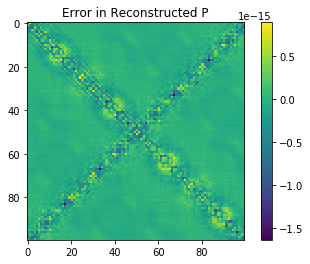

In [66]:
P_sqrt = covariance.matrix_sqrt(eig_val=eig_val,
                                eig_vec=eig_vec)
P_sqrt = P_sqrt.real

plt.figure()
im = plt.imshow(P_sqrt)
plt.colorbar(im)
plt.title('Square Root')

plt.figure()
im = plt.imshow(P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Reconstructed P')

plt.figure()
im = plt.imshow(P - P_sqrt @ P_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed P')

Text(0.5,1,'Error in Reconstructed inverse')

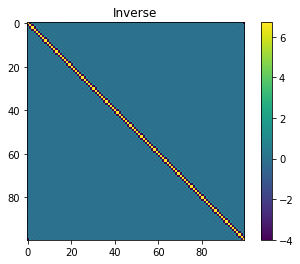

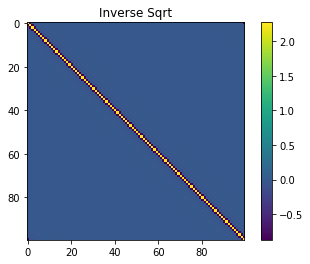

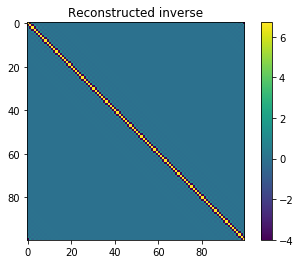

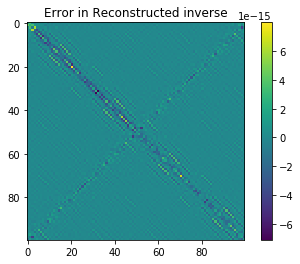

In [67]:
P_inv = covariance.matrix_inv(eig_val=eig_val,
                              eig_vec=eig_vec)
P_inv = P_inv.real

P_inv_sqrt = covariance.matrix_sqrt_inv(
    eig_val=eig_val,
    eig_vec=eig_vec)

P_inv_sqrt = P_inv_sqrt.real

plt.figure()
im = plt.imshow(P_inv)
plt.colorbar(im)
plt.title('Inverse')

plt.figure()
im = plt.imshow(P_inv_sqrt)
plt.colorbar(im)
plt.title('Inverse Sqrt')

plt.figure()
im = plt.imshow(P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Reconstructed inverse')

plt.figure()
im = plt.imshow(P_inv - P_inv_sqrt @ P_inv_sqrt)
plt.colorbar(im)
plt.title('Error in Reconstructed inverse')

In [68]:
ens_size = int(1e6)
mu = np.zeros(dimension)
X_ens = assimilate.generate_ensemble(
    ens_size, mu, P_sqrt)

In [69]:
mu_sample = X_ens.mean(axis=1)
P_sample = np.cov(X_ens)

Text(0.5,1,'Sample mean')

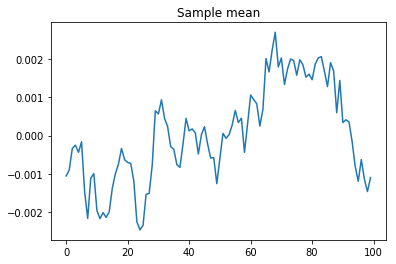

In [70]:
plt.figure()
plt.plot(mu_sample)
plt.title('Sample mean')

Text(0.5,1,'Error of sample')

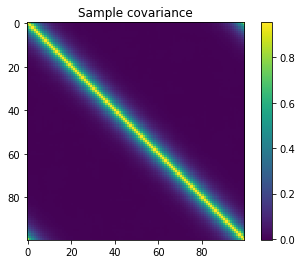

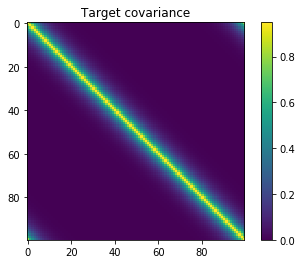

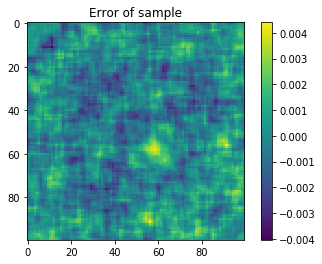

In [71]:
plt.figure()
im = plt.imshow(P_sample)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P)
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_sample - P)
plt.colorbar(im)
plt.title('Error of sample')

In [72]:
ens_size = int(1e6)
num_of_eig = 20
mu = np.zeros(dimension)
X_ens = assimilate.generate_ensemble(
    ens_size, mu,
    eig_val=eig_val[:num_of_eig],
    eig_vec=eig_vec[:, :num_of_eig])

In [73]:
mu_sample = X_ens.mean(axis=1)
P_sample = np.cov(X_ens)

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'Sample mean')

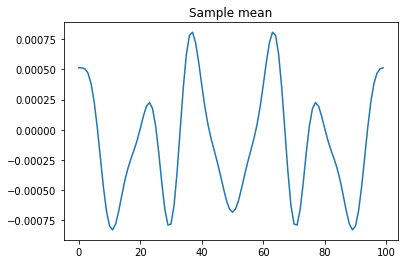

In [74]:
plt.figure()
plt.plot(mu_sample)
plt.title('Sample mean')

Text(0.5,1,'Error of sample covariance')

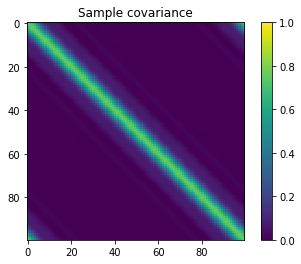

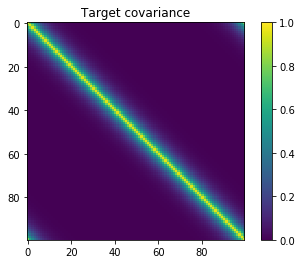

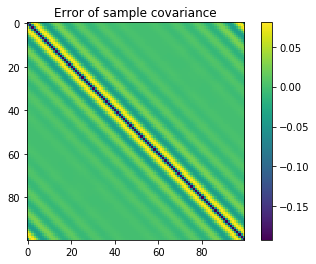

In [75]:
plt.figure()
im = plt.imshow(P_sample.real, vmin=0, vmax=1)
plt.colorbar(im)
plt.title('Sample covariance')

plt.figure()
im = plt.imshow(P, vmin=0, vmax=1)
plt.colorbar(im)
plt.title('Target covariance')

plt.figure()
im = plt.imshow(P_sample.real - P)
plt.colorbar(im)
plt.title('Error of sample covariance')

# Older stuff

In [ ]:
dimension = 40
rho0 = 6
rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
P_cov = covariance.make_correlation_matrix(
    rho, rho0, covariance.correlation_sqd_exp)

In [ ]:
plt.figure()
image = plt.imshow(P_cov, vmin=0, vmax=1)
plt.colorbar(image)
plt.title('Covariance matrix')
print(np.log10(np.linalg.cond(P_cov)))

In [ ]:
plt.figure()
plt.plot(P_cov[0,:])
plt.title('First row of P_cov')

In [ ]:
eig_val = np.fft.fft(P_cov[0, :])
eig_vec = np.fft.fft(np.eye(dimension))/np.sqrt(dimension)
#eig_vec = sp.linalg.dft(dimension)/np.sqrt(dimension)

In [ ]:
plt.figure()
im = plt.imshow((eig_vec.conj().T @ eig_vec).real)
plt.colorbar(im)

In [ ]:
P_hat = eig_vec @ np.diag(eig_val.real) @ eig_vec.conj().T

In [ ]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [ ]:
P_sqrt = (eig_vec
          @ np.diag(np.sqrt(eig_val))
          @ eig_vec.conj().T)

In [ ]:
plt.figure()
im = plt.imshow(P_sqrt.real)
plt.colorbar(im)
plt.title('Real part sqrt from fft')

plt.figure()
im = plt.imshow(P_cov - (P_sqrt.real @ P_sqrt.real))
plt.colorbar(im)
plt.title('Error from only real part')

plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('imaginary part sqrt from fft')

plt.figure()
im = plt.imshow(P_cov - (P_sqrt @ P_sqrt).real)
plt.colorbar(im)
plt.title('Error with complex')

In [ ]:
P_reconst = P_sqrt @ P_sqrt

In [ ]:
P_new = P_reconst.real - P_reconst.imag

In [ ]:
eig_val = np.fft.fft(P_new[0, :])

In [ ]:
P_hat = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T

In [ ]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [ ]:
P_sqrt = (eig_vec
          @ np.diag(np.sqrt(eig_val))
          @ eig_vec.conj().T)

In [ ]:
plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('Imaginary part from fft')

plt.figure()
im = plt.imshow((P_sqrt.real @ P_sqrt.real) - P_cov)
plt.colorbar(im)
plt.title('Error')

In [ ]:
P_reconst = P_sqrt @ P_sqrt

In [ ]:
P_new = P_reconst.real - P_reconst.imag

In [ ]:
eig_val = np.fft.fft(P_new[0, :])

In [ ]:
P_hat = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T

In [ ]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [ ]:
P_sqrt = (eig_vec
          @ np.diag(np.sqrt(eig_val))
          @ eig_vec.conj().T)

In [ ]:
plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('Imaginary part from fft')

plt.figure()
im = plt.imshow((P_sqrt.real @ P_sqrt.real) - P_cov)
plt.colorbar(im)
plt.title('Error')

In [ ]:
P_reconst = P_sqrt @ P_sqrt

In [ ]:
P_new = P_reconst.real - P_reconst.imag

In [ ]:
eig_val = np.fft.fft(P_new[0, :])

In [ ]:
P_hat = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T

In [ ]:
plt.figure()
im = plt.imshow(P_hat.real)
plt.colorbar(im)
plt.title('Reconstruction from fft')

plt.figure()
im = plt.imshow(P_hat.real - P_cov)
plt.colorbar(im)
plt.title('Error')

In [ ]:
P_sqrt = (eig_vec
          @ np.diag(np.sqrt(eig_val))
          @ eig_vec.conj().T)

In [ ]:
plt.figure()
im = plt.imshow(P_sqrt.imag)
plt.colorbar(im)
plt.title('Imaginary part from fft')

plt.figure()
im = plt.imshow((P_sqrt.real @ P_sqrt.real) - P_cov)
plt.colorbar(im)
plt.title('Error')